<a href="https://colab.research.google.com/github/dhnam/diversity/blob/master/diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
from matplotlib import pyplot as plt


In [0]:
class Gene:
    def __init__(self, number=-1):
        if number == -1:
            self.number = random.randrange(0, 101)
        else:
            self.number = number

    def mutate(self, rate):
        return Gene(int(round(self.number + random.gauss(0, rate))))


class Creature:
    def __init__(self, gene=None):
        if gene is None:
            self.gene = Gene()
        else:
            self.gene = gene
        self.death = False

    def reproduce(self, rate):
        nextgen1 = Creature(self.gene.mutate(rate))
        nextgen2 = Creature(self.gene.mutate(rate))
        return nextgen1, nextgen2

    def kill(self):
        self.death = True

    def __str__(self):
        return str(self.death)


class Species:
    def __init__(self, mutate_rate):
        self.creature_list = []
        for a in range(100):
            self.creature_list.append(Creature())
        self.mutate_rate = mutate_rate

    def get_size(self):
        return len(self.creature_list)

    def __str__(self):
        return str(len(self.creature_list))

    def next_gen(self):
        next_list = []
        for next_creature in self.creature_list:
            next_list += next_creature.reproduce(self.mutate_rate)
        self.creature_list = next_list

    def process_kill(self):
        next_list = []
        for next_creature in self.creature_list:
            if not next_creature.death:
                next_list.append(next_creature)
        self.creature_list = next_list

    def to_csv(self):
        return_list = []
        for next_creature in self.creature_list:
            return_list.append(str(next_creature.gene.number))
        return return_list


class Environment:
    def __init__(self, env_change_rate):
        self.species_list = [Species(x) for x in np.arange(0, 5, 0.5)]
        self.env_change_rate = env_change_rate
        self.env_num = random.randrange(0, 101)
        self.generation = 0

    def change_env(self):
        random_val = random.gauss(0, self.env_change_rate)
        if self.env_num + random_val > 100 or self.env_num + random_val < 0:
            next_num = self.env_num - random_val
        else:
            next_num = self.env_num + random_val
        self.env_num = round(next_num)

    def is_dead(self, creature):
        num = creature.gene.number
        if -10 < num - self.env_num < 10:
            if random.random() < 0.9:
                return False
            else:
                return True
        elif -20 < num - self.env_num < 20:
            if random.random() < 0.8:
                return False
            else:
                return True
        elif -30 < num - self.env_num < 30:
            if random.random() < 0.1:
                return False
            else:
                return True
        else:
            if random.random() < 0.01:
                return False
            else:
                return True

    def natural_selection(self):
        for next_species in self.species_list:
            for next_creature in next_species.creature_list:
                if self.is_dead(next_creature):
                    next_creature.kill()

        for next_species in self.species_list:
                next_species.process_kill()

        for next_species in self.species_list:
            next_species.next_gen()

        creature_num = 0
        for next_species in self.species_list:
            creature_num += next_species.get_size()

        if creature_num > 500:
            to_kill = creature_num - 500
            kill_list = random.sample(range(1, creature_num + 1), to_kill)
            counter = 1
            for next_species in self.species_list:
                for next_creature in next_species.creature_list:
                    if counter in kill_list:
                        next_creature.kill()
                    counter += 1

            for next_species in self.species_list:
                next_species.process_kill()

        self.generation += 1


    def get_result(self):
        return [next_spice.get_size() for next_spice in self.species_list]


0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5


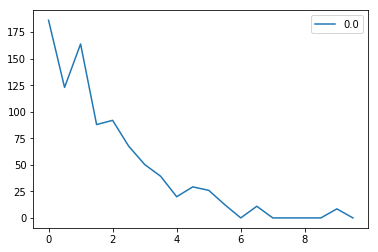

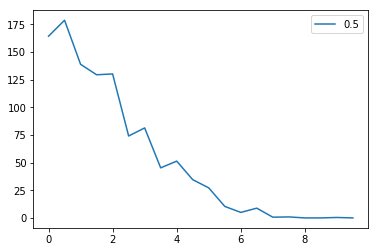

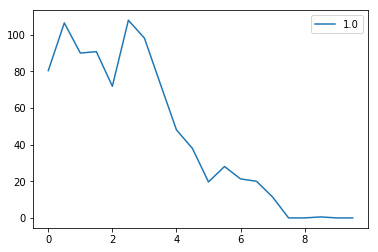

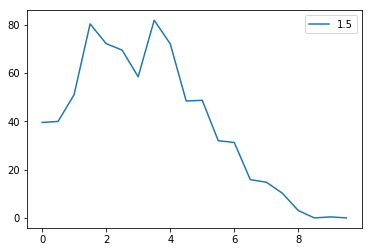

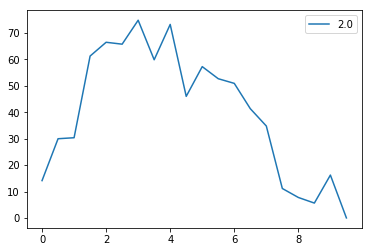

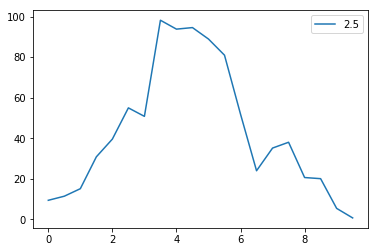

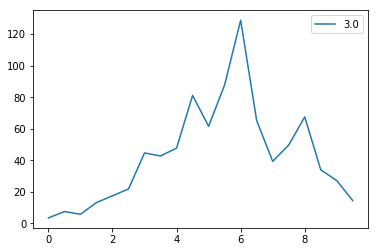

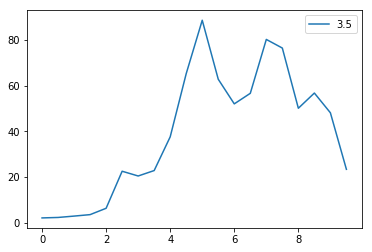

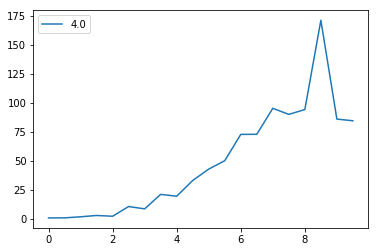

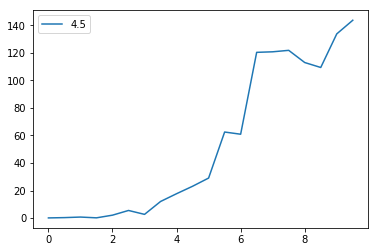

In [50]:
plot_x = []
tot_res_lst = []
for i in np.arange(0, 10, 0.5):
    plot_x.append(i)
    res_lst = []
    for cnt in range(50):
        env = Environment(i)
        for _ in range(100):
            env.change_env()
            env.natural_selection()
        res_lst.append(env.get_result())
    tot_res_lst.append([sum([res_lst[j][k] for j, _ in enumerate(res_lst)])\
                             /len(res_lst) for k, _ in enumerate(res_lst[0])])
    print(i)
tot_res_lst = list(map(list, zip(*tot_res_lst)))
for i, next_res in enumerate(tot_res_lst):
        plt.plot(plot_x, next_res, label=i/2)
        plt.legend()
        plt.show()

